With what information does Bayes Theorem update our previous knowledge about the data parameters?

A: We could use the the information(prior probability) we have to predict the future probabiliity.

What does the prior probability represent?

A: For the most time, Prior probability is the informaion we collect from the history. For example, the accuracy rate for someone's prediction. We could easily get this information from his pervious record. With this record and Bayes Theorem, we could calulate the accuracy rate of his future prediictions. 

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
url = 'https://raw.githubusercontent.com/ArashVafa/DESC624/master/wine_flag_training.csv'
train = pd.read_csv(url)
train.head(5)


,Type,Alcohol_flag,Sugar_flag
0,Red,High,High
1,Red,High,Low
2,Red,Low,High
3,Red,High,Low
4,Red,Low,Low


In [ ]:
train['Alcohol_flag'].value_counts(normalize=True) * 100

Low     51.4
High    48.6
Name: Alcohol_flag, dtype: float64

In [ ]:
train['Sugar_flag'].value_counts(normalize=True) * 100

Low     58.4
High    41.6
Name: Sugar_flag, dtype: float64

In [ ]:
train['Type'].value_counts(normalize=True) * 100

White    50.0
Red      50.0
Name: Type, dtype: float64

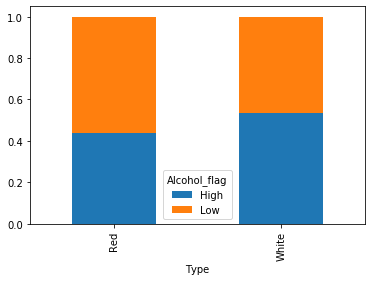

In [ ]:
crosstab_01 = pd.crosstab(train['Type'], train['Alcohol_flag'])
crosstab_norm_01 = crosstab_01.div(crosstab_01.sum(1),axis = 0)
crosstab_norm_01.plot(kind = 'bar', stacked = True)

In [ ]:
round(crosstab_01.div(crosstab_01.sum(0), axis = 1) *100,1)

Alcohol_flag,High,Low
Type,,
Red,44.9,54.9
White,55.1,45.1


p(Alcohol_flag = High ∣ Type = Red) = 44.9% 

p(Alcohol_flag = Low ∣ Type = Red) = 54.9%

p(Alcohol_flag = High ∣ Type = White) = 55.1%

p(Alcohol_flag = Low ∣ Type = White) = 45.1%


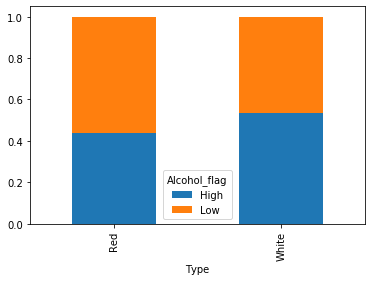

In [ ]:
crosstab_02 = pd.crosstab(train['Type'], train['Sugar_flag'])
crosstab_norm_02 = crosstab_01.div(crosstab_01.sum(1),axis = 0)
crosstab_norm_02.plot(kind = 'bar', stacked = True)

In [ ]:
round(crosstab_02.div(crosstab_02.sum(0), axis = 1) *100,1)

Sugar_flag,High,Low
Type,,
Red,27.9,65.8
White,72.1,34.2


In [ ]:
crosstab_03 = pd.crosstab(train['Sugar_flag'], train['Type'])
round(crosstab_03.div(crosstab_03.sum(0), axis = 1) *100,1)

Type,Red,White
Sugar_flag,,
High,23.2,60.0
Low,76.8,40.0


In [ ]:
crosstab_04 = pd.crosstab(train['Alcohol_flag'], train['Type'])
round(crosstab_04.div(crosstab_04.sum(0), axis = 1) *100,1)

Type,Red,White
Alcohol_flag,,
High,43.6,53.6
Low,56.4,46.4


p(Sugar_flag = High ∣ Type = Red) = 27.9%

p(Sugar_flag = Low ∣ Type = Red) = 65.8%

p(Sugar_flag = High ∣ Type = White)  = 72.1%

and p(Sugar_flag = Low ∣ Type = White) = 34.2%

•	How likely it is that a randomly selected wine is red.

A: 50%

•	How likely it is that a randomly selected wine has a high alcohol content.

A: 48.6%

•	How likely it is that a randomly selected wine has a low sugar content.

A: 58.4% 

•	What a typical white wine might have as its alcohol and sugar content.

A: A white wine would have high sugar and alcohol. 

•	What a typical red wine might have as its alcohol and sugar content.

A: You may have a little bit higher probability to get a high alcholhol level for red wine. At the same time, the most red wine has a low sugar level. 

Type = Red for a wine that is low in alcohol content and high in sugar content

A: p(red|alclow low and sugar high) = P(Alcohol low|Red) * P(Sugar_High|Red) * P(Red)/【(P(Alcohol low) * P(Sugar High)】

=(0.549 * 0.279) * 0.5 / 0.514 / 0.416 = 0.358

Type = white for a wine that is low in alcohol content and high in sugar content

A: p(white|alclow low and sugar high) = P(Alcohol low|white) * P(Sugar_High|white) * P(white)/【(P(Alcohol low) * P(Sugar High)】

= 0.451 * 0,721 * 0.5 / 0.514 / 0.416 = 0.760

White wine is more likely to have a low alcohol content and high sugar content. 

Type = Red for a wine that is high in alcohol content and low in sugar content 

A: p(red|alclow high and sugar low) = P(Alcohol high|Red) * P(Sugar_low|Red) * P(Red)/【(P(Alcohol high) * P(Sugar low)】

= 0.449 * 0.658 * 0.5 / 0.486 / 0.584 = 0.52

Type = white for a wine that is high in alcohol content and low in sugar content

p(white|alclow high and sugar low) = P(Alcohol high|white) * P(Sugar_low|white) * P(white)/【(P(Alcohol high) * P(Sugar low)】

= 0.551 * 0.341 * 0.5 / 0.486 / 0.584 = 0.334

Red wine is more likely to have a High alcohol content and low sugar content. NB follows the probability, I think NB's answer would be same us ours. 

In [ ]:

from sklearn.naive_bayes import GaussianNB 
from sklearn.naive_bayes import MultinomialNB 

from inspect import signature

import sklearn
from sklearn import linear_model, dummy, metrics
from sklearn.dummy import DummyClassifier
from sklearn.metrics import *


In [ ]:
train['Type']= train['Type'].replace({'Red': 1})
train['Type']= train['Type'].replace({'White': 0})
train['Alcohol_flag']= train['Alcohol_flag'].replace({'Low': 0})
train['Alcohol_flag']= train['Alcohol_flag'].replace({'High': 1})
train['Sugar_flag']= train['Sugar_flag'].replace({'Low': 0})
train['Sugar_flag']= train['Sugar_flag'].replace({'High': 1})
train.head(10)

,Type,Alcohol_flag,Sugar_flag
0,1,1,1
1,1,1,0
2,1,0,1
3,1,1,0
4,1,0,0
5,1,0,0
6,1,1,0
7,1,0,0
8,1,0,0
9,1,0,0


In [ ]:
X = train.drop(['Type'], axis =1)
y = train['Type']



In [ ]:
url = 'https://raw.githubusercontent.com/ArashVafa/DESC624/master/wine_flag_test.csv'
test = pd.read_csv(url)

test['Type']= test['Type'].replace({'Red': 1})
test['Type']= test['Type'].replace({'White': 0})
test['Alcohol_flag']= test['Alcohol_flag'].replace({'Low': 0})
test['Alcohol_flag']= test['Alcohol_flag'].replace({'High': 1})
test['Sugar_flag']= test['Sugar_flag'].replace({'Low': 0})
test['Sugar_flag']= test['Sugar_flag'].replace({'High': 1})
test.head(10)

,Type,Alcohol_flag,Sugar_flag
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0
5,1,0,0
6,1,0,0
7,1,0,0
8,1,0,0
9,1,0,0


In [ ]:
X1 = test.drop(['Type'], axis =1)
y1 = test['Type']



In [ ]:
NB = GaussianNB()
nb = NB.fit(X,y)
y_predict = nb.predict


In [ ]:
y_predict = pd.DataFrame(y_predict,index = y1.index, columns = ['Type'])
y_predict['Type'].value_counts()

0    1203
1    1142
Name: Type, dtype: int64

In [ ]:
dummy = DummyClassifier(strategy= 'uniform')
dumb = dummy.fit(X,y)
dumb_pred = dumb.predict(X1)
dumb_pred_prob = dumb.predict_proba(X1)

In [ ]:
print("Test accuracy (naive bayes) =", 100*nb.score(X1,y1), end="% \n\n")
print("Test accuracy (Dummy Classifier) =", 100*dumb.score(dumb_pred,y1), end="%")

Test accuracy (naive bayes) = 65.9275053304904% 

Test accuracy (Dummy Classifier) = 50.83155650319829%

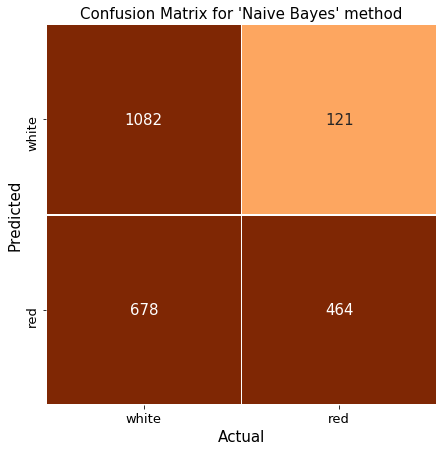

In [ ]:
cm_nb = confusion_matrix(y1, y_predict)
#put it into a dataframe for seaborn plot function
cm_nb_df = pd.DataFrame(cm_nb)

#Use a seaborn heatmap to plot confusion matrices
#The dataframe is transposed to make Actual values on x-axis and predicted on y-axis
#annot = True includes the numbers in each box
#vmin and vmax just adjusts the color value
fig, ax = plt.subplots(figsize = (7,7))
sns.heatmap(cm_nb_df.T, annot=True, annot_kws={"size": 15}, cmap="Oranges", vmin=0, vmax=300, fmt='.0f', linewidths=1, linecolor="white", cbar=False,
)
plt.ylabel("Predicted", fontsize=15)
plt.xlabel("Actual", fontsize=15)
ax.set_xticklabels(['white', 'red'], fontsize=13)
ax.set_yticklabels(['white','red'], fontsize=13)
plt.title("Confusion Matrix for 'Naive Bayes' method", fontsize=15)

plt.show()

correctly classifies red wines: 464/(678+464) = 0.41

correctly classifies white wines: 1082/ (121+1082) = 0.9

In [ ]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
X_lr = lr.fit(X, y)

y_predictLR = X_lr.predict(X1cm_LR = confusion_matrix(y_test, y_predictLR)
#put it into a dataframe for seaborn plot function
cm_LR_df = pd.DataFrame(cm_LR)



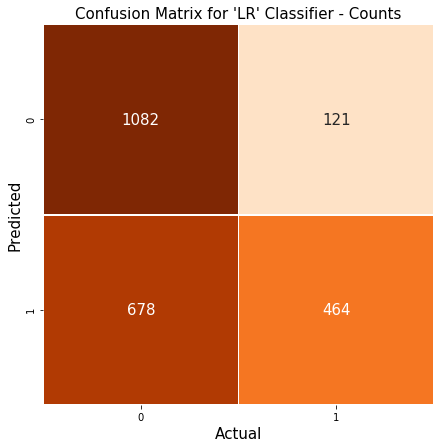

In [ ]:
cm_LR = confusion_matrix(y1, y_predictLR)
#put it into a dataframe for seaborn plot function
cm_LR_df = pd.DataFrame(cm_LR)

#Use a seaborn heatmap to plot confusion matrices
#The dataframe is transposed to make Actual values on x-axis and predicted on y-axis
#annot = True includes the numbers in each box
#vmin and vmax just adjusts the color value
fig, ax = plt.subplots(figsize = (7,7))
sns.heatmap(cm_LR_df.T, annot=True, annot_kws={"size": 15}, cmap="Oranges", vmin=0, vmax=800, fmt='.0f', linewidths=1, linecolor="white", cbar=False,
)
plt.ylabel("Predicted", fontsize=15)
plt.xlabel("Actual", fontsize=15)
plt.title("Confusion Matrix for 'LR' Classifier - Counts", fontsize=15)

plt.show()